In [12]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras import utils


In [2]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [4]:
X_train_total = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train_total = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [5]:
split_train = train_df[train_df['Participant_ID']<=460]
splt_val = train_df[train_df['Participant_ID']>460]

X_train = split_train.drop(["Participant_ID", "Depression"], axis=1)
y_train = split_train[["Participant_ID", "Depression", "Gender"]]

X_val = splt_val.drop(["Participant_ID", "Depression"], axis=1)
y_val = splt_val[["Participant_ID", "Depression", "Gender"]]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_val = scaler.transform(X_val)

In [40]:
utils.set_random_seed(3)
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),
                kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
trained_model = model.fit(X_scaled, np.array(y_train["Depression"]), 
                           epochs=50,batch_size=16, 
                           validation_data=(X_scaled_val, np.array(y_val["Depression"])),
                           class_weight = calculate_class_weights(y_train, "Depression"))


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 32)                2880      
                                                                 
 dropout_36 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_60 (Dense)            (None, 16)                528       
                                                                 
 dropout_38 (Dropout)        (None, 16)                0         
                                                                 
 dense_61 (Dense)            (None, 1)               

Epoch 1/50
703/703 [==============================] - 1s 572us/step - loss: 1.3823 - accuracy: 0.5029 - val_loss: 1.1022 - val_accuracy: 0.0094
Epoch 2/50
703/703 [==============================] - 0s 480us/step - loss: 0.8919 - accuracy: 0.4747 - val_loss: 0.8006 - val_accuracy: 0.4288
Epoch 3/50
703/703 [==============================] - 0s 517us/step - loss: 0.7347 - accuracy: 0.6195 - val_loss: 0.6635 - val_accuracy: 0.8847
Epoch 4/50
703/703 [==============================] - 0s 491us/step - loss: 0.6853 - accuracy: 0.6584 - val_loss: 0.7262 - val_accuracy: 0.6054
Epoch 5/50
703/703 [==============================] - 0s 473us/step - loss: 0.6714 - accuracy: 0.6750 - val_loss: 0.6954 - val_accuracy: 0.6275
Epoch 6/50
703/703 [==============================] - 0s 490us/step - loss: 0.6671 - accuracy: 0.6781 - val_loss: 0.6352 - val_accuracy: 0.7566
Epoch 7/50
703/703 [==============================] - 0s 492us/step - loss: 0.6594 - accuracy: 0.6912 - val_loss: 0.6919 - val_accuracy:

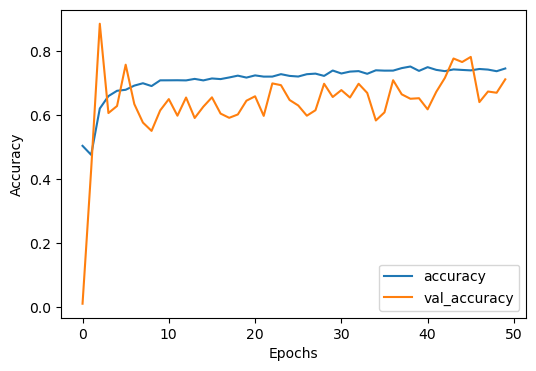

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Train on entire dataset and test it on test data

In [42]:
scaler = StandardScaler()
X_scaled_total = scaler.fit_transform(X_train_total)
X_scaled_test = scaler.transform(X_test)

In [43]:
utils.set_random_seed(3)
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),
                kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 32)                2880      
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                1056      
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_64 (Dense)            (None, 16)                528       
                                                                 
 dropout_41 (Dropout)        (None, 16)                0         
                                                                 
 dense_65 (Dense)            (None, 1)               

In [44]:
trained_model = model.fit(X_scaled_total, np.array(y_train_total["Depression"]), 
                           epochs=50,batch_size=16, 
                           class_weight = calculate_class_weights(y_train, "Depression"))

Epoch 1/50
816/816 [==============================] - 1s 405us/step - loss: 1.2504 - accuracy: 0.6044
Epoch 2/50
816/816 [==============================] - 0s 392us/step - loss: 0.7883 - accuracy: 0.7062
Epoch 3/50
816/816 [==============================] - 0s 391us/step - loss: 0.6708 - accuracy: 0.7109
Epoch 4/50
816/816 [==============================] - 0s 401us/step - loss: 0.6449 - accuracy: 0.7158
Epoch 5/50
816/816 [==============================] - 0s 424us/step - loss: 0.6375 - accuracy: 0.7185
Epoch 6/50
816/816 [==============================] - 0s 400us/step - loss: 0.6325 - accuracy: 0.7240
Epoch 7/50
816/816 [==============================] - 0s 391us/step - loss: 0.6281 - accuracy: 0.7299
Epoch 8/50
816/816 [==============================] - 0s 393us/step - loss: 0.6182 - accuracy: 0.7401
Epoch 9/50
816/816 [==============================] - 0s 394us/step - loss: 0.6201 - accuracy: 0.7348
Epoch 10/50
816/816 [==============================] - 0s 401us/step - loss: 0.616

In [45]:
y_pred = model.predict(X_scaled_test)
y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)

97/97 [==============================] - 0s 278us/step


/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_23977/1533113757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)


In [46]:
y_test

,Participant_ID,Depression,Gender,Depression_prediction,Depression_predicted
0,474,0,1,0,0
1,474,0,1,1,0
2,474,0,1,0,0
3,474,0,1,0,0
4,474,0,1,0,0
...,...,...,...,...,...
3086,479,0,1,1,1
3087,479,0,1,0,0
3088,479,0,1,0,0
3089,479,0,1,0,0


Accuracy: 0.65
Balanced Accuracy: 0.5595238095238095
Equality of Opportunity: 0.19999999999999996


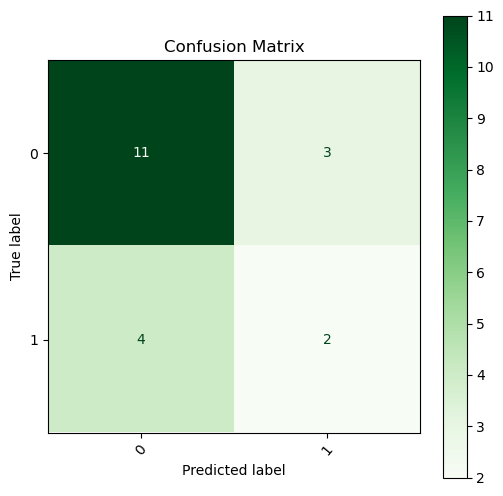

In [47]:
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)
print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")
show_conf_matrix(y_test)